In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Session_Datasets/household_power_consumption.txt",sep=";")

In [ ]:
df.dtypes

,0
Date,object
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


In [ ]:
df.replace("?",pd.NA,inplace=True)

In [6]:
df[df.isnull().any(axis=1)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
6840,21/12/2006,11:24:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
19724,30/12/2006,10:08:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
19725,30/12/2006,10:09:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
41832,14/1/2007,18:36:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
...,...,...,...,...,...,...,...,...,...
303940,15/7/2007,19:04:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
303941,15/7/2007,19:05:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
303942,15/7/2007,19:06:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
303943,15/7/2007,19:07:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN


In [7]:
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,3905
Global_reactive_power,3906
Voltage,3906
Global_intensity,3906
Sub_metering_1,3906
Sub_metering_2,3906
Sub_metering_3,3906


In [8]:
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # converts to float, handles missing
    df[col].fillna(df[col].median(), inplace=True) # Imputation

/tmp/ipython-input-8-2220546796.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True) # Imputation


In [9]:
# Combining Date and time
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format="%d/%m/%Y %H:%M:%S")
df.set_index('Datetime', inplace=True)

In [10]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [11]:
# Getting few columns from DateTime Columns

df['hour'] = df.index.hour
df['day'] = df.index.day
df['weekday'] = df.index.weekday
df['month'] = df.index.month


In [12]:
df.reset_index(inplace=True)

## Checking Distribution

In [13]:
# for i in df.columns:
#     plt.figure(figsize=(16,6))
#     sns.kdeplot(df[i], shade=True)
#     plt.title(i)
#     plt.show()

In [14]:
# Outlier treatment
for col in numeric_cols:
    df[col + '_log'] = np.log1p(df[col])

In [15]:
log_columns=["Global_active_power_log","Global_reactive_power_log","Voltage_log","Global_intensity_log","Sub_metering_1_log","Sub_metering_2_log","Sub_metering_3_log"]

In [16]:
# for i in log_columns:
#     plt.figure(figsize=(16,6))
#     sns.kdeplot(df[i], shade=True)
#     plt.title(i)
#     plt.show()

In [17]:
df.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,weekday,month,Global_active_power_log,Global_reactive_power_log,Voltage_log,Global_intensity_log,Sub_metering_1_log,Sub_metering_2_log,Sub_metering_3_log
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,17,16,5,12,1.651731,0.349247,5.463154,2.965273,0.0,0.693147,2.890372
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17,16,5,12,1.850028,0.361861,5.458010,3.178054,0.0,0.693147,2.833213
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,17,16,5,12,1.852227,0.404131,5.456560,3.178054,0.0,1.098612,2.890372
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,17,16,5,12,1.854421,0.406798,5.458479,3.178054,0.0,0.693147,2.890372
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,17,16,5,12,1.540302,0.423960,5.466709,2.821379,0.0,0.693147,2.890372


## Model Building

In [18]:
# Feature Selection

val = df[[
    'Global_reactive_power', 'Voltage', 'Global_intensity',
    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
    'hour', 'day', 'weekday', 'month'
]]


tar=df['Global_active_power_log']

trdata,tsdata,trlab,tslab = train_test_split(val,tar,test_size=0.20,random_state=77)


In [19]:
rf_model = RandomForestRegressor(n_estimators=5,random_state=77)

In [20]:
rf_model.fit(trdata,trlab)


RandomForestRegressor(n_estimators=5, random_state=77)

In [21]:
# Training Performance
tr_pred=rf_model.predict(trdata)

In [22]:
mse = mean_squared_error(trlab,tr_pred)
rmse = np.sqrt(mean_squared_error(trlab, tr_pred))

In [23]:
mse

3.389522250203358e-05

In [24]:
rmse

np.float64(0.005821960365893397)

In [25]:
# Testing Performance
ts_pred=rf_model.predict(tsdata)

In [26]:
mean_squared_error(tslab,ts_pred)

0.00015748284870065218

In [27]:
rmse=np.sqrt(mean_squared_error(tslab,ts_pred))
rmse

np.float64(0.012549217055284851)

## model 2

In [28]:
rf_model = RandomForestRegressor(n_estimators=50,random_state=77)

In [29]:
rf_model.fit(trdata,trlab)


RandomForestRegressor(n_estimators=50, random_state=77)

In [30]:
# Training Performance
tr_pred=rf_model.predict(trdata)

In [31]:
mean_squared_error(trlab,tr_pred)

1.968914853440259e-05

In [32]:
rmse = np.sqrt(mean_squared_error(trlab, tr_pred))

In [33]:
rmse

np.float64(0.0044372456022179554)

In [34]:
# Testing Performance
ts_pred=rf_model.predict(tsdata)

In [35]:
mean_squared_error(tslab,ts_pred)

0.00013393727139064993

In [36]:
rmse=np.sqrt(mean_squared_error(tslab,ts_pred))
rmse

np.float64(0.011573127122374917)

## model 3

In [37]:
rf_model = RandomForestRegressor(n_estimators=50,random_state=77,max_depth=4)

In [38]:
rf_model.fit(trdata,trlab)

RandomForestRegressor(max_depth=4, n_estimators=50, random_state=77)

In [39]:
tr_pred=rf_model.predict(trdata)

In [40]:
ts_pred=rf_model.predict(tsdata)

MSE

In [51]:
#Training MSE
mean_squared_error(trlab,tr_pred)

0.0014757576975705199

In [50]:
#Testing MSE
mean_squared_error(tslab,ts_pred)

0.001473642305443776

RMSE

In [52]:
from sklearn.metrics import root_mean_squared_error

In [53]:
# training RMSE
root_mean_squared_error(trlab,tr_pred)

0.038415591855007515

In [54]:
#testing RMSE
root_mean_squared_error(tslab,ts_pred)

0.038388048992411376

Grid Seach Params

In [59]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50],
#     'max_depth': [3, 4, 5, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid = GridSearchCV(
#     estimator=RandomForestRegressor(random_state=77),
#     param_grid=param_grid,
#     cv=3,
#     scoring='neg_mean_squared_error',
#     n_jobs=-1
# )

# grid.fit(trdata, trlab)
# print("Best parameters:", grid.best_params_)


In [61]:
# Predicting on test data
predictions = rf_model.predict(tsdata)

# View actual vs predicted
comparison_df = pd.DataFrame({
    'Actual': tslab,
    'Predicted': predictions
})

comparison_df.head(10)


,Actual,Predicted
153614,0.896088,0.903758
211580,0.979078,1.014548
110046,0.198851,0.194069
197536,1.155623,1.123280
10980,0.855266,1.014548
28567,0.227932,0.267329
289377,0.323532,0.336815
235547,0.976068,1.014548
71792,0.889536,0.903758
34233,0.249980,0.267329


Actual vs Predicted Plot

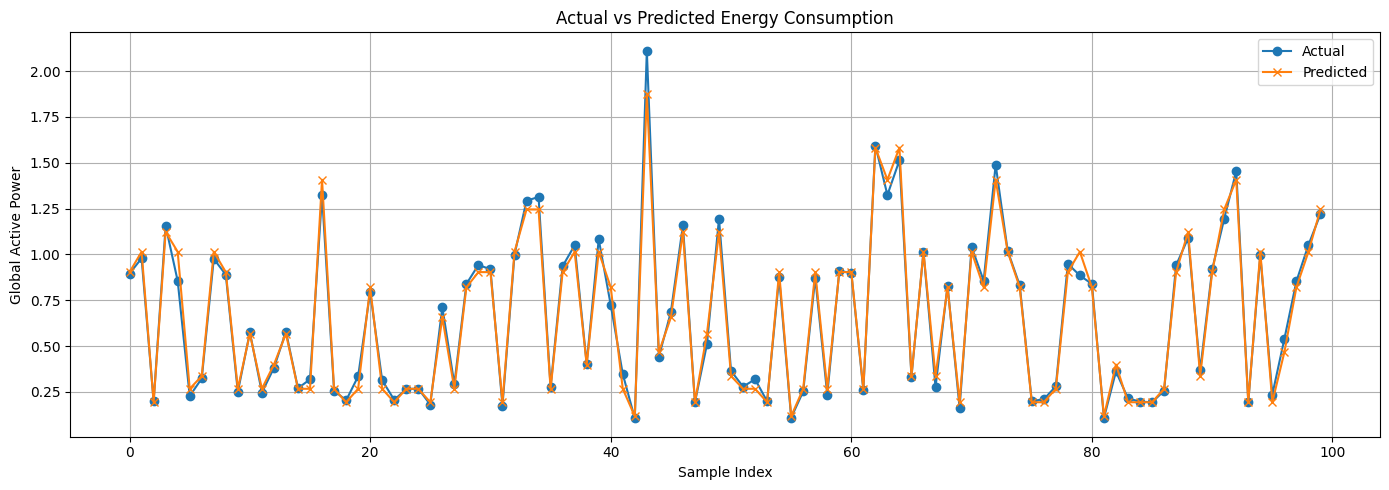

In [66]:
plt.figure(figsize=(14,5))
plt.plot(tslab.values[:100], label='Actual', marker='o')
plt.plot(ts_pred[:100], label='Predicted', marker='x')
plt.title("Actual vs Predicted Energy Consumption")
plt.xlabel("Sample Index")
plt.ylabel("Global Active Power")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# XGBoost

In [70]:
import xgboost as xgb
from xgboost import XGBRegressor

In [71]:
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=77
)

xgb_model.fit(trdata, trlab)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=77, ...)

In [72]:
# Training Prediction
tr_pred= xgb_model.predict(trdata)

In [73]:
# Testing Prediction
ts_pred = xgb_model.predict(tsdata)

In [74]:
#Training MSE
mean_squared_error(trlab,tr_pred)

0.00027122725991946944

In [75]:
#Testing MSE
mean_squared_error(tslab,ts_pred)

0.0002729744927350924

RMSE

In [76]:
# training RMSE
root_mean_squared_error(trlab,tr_pred)

0.016468978715131956

In [77]:
#testing RMSE
root_mean_squared_error(tslab,ts_pred)

0.016521939738877285

In [78]:
# View actual vs predicted
comparison_df = pd.DataFrame({
    'Actual': tslab,
    'Predicted': ts_pred
})

comparison_df.head(10)


,Actual,Predicted
153614,0.896088,0.885875
211580,0.979078,0.970645
110046,0.198851,0.191505
197536,1.155623,1.164317
10980,0.855266,0.958151
28567,0.227932,0.248391
289377,0.323532,0.321899
235547,0.976068,0.954996
71792,0.889536,0.877418
34233,0.249980,0.252732


Actual vs Predicted Plot XGBoost

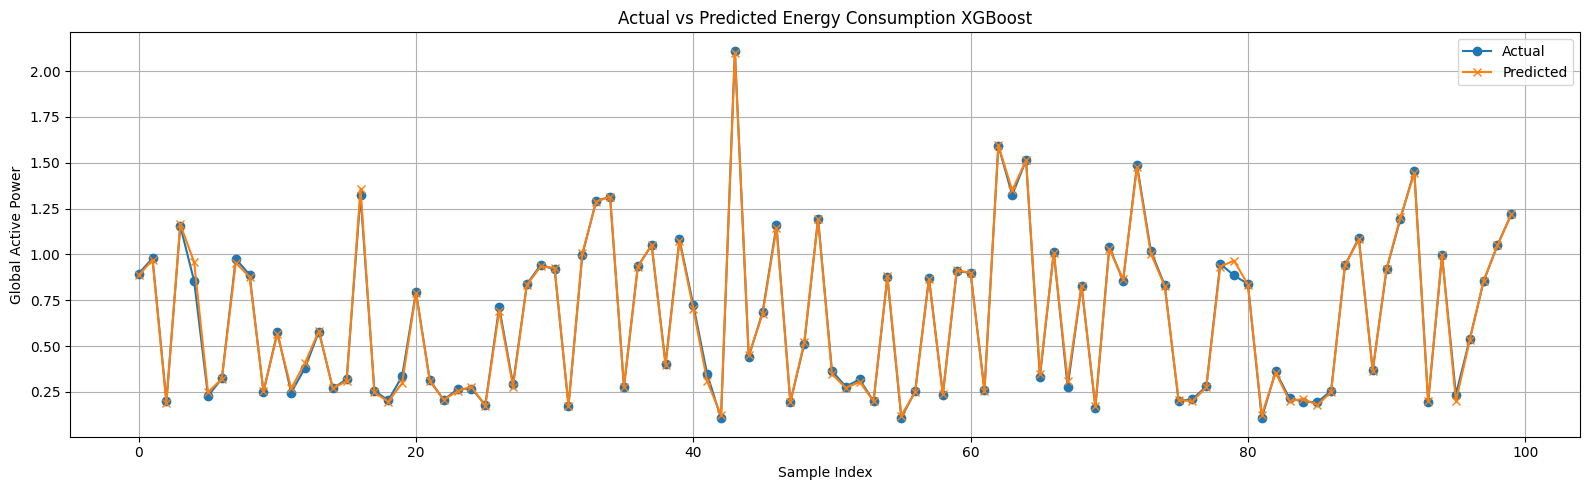

In [80]:
plt.figure(figsize=(16,5))
plt.plot(tslab.values[:100], label='Actual', marker='o')
plt.plot(ts_pred[:100], label='Predicted', marker='x')
plt.title("Actual vs Predicted Energy Consumption XGBoost")
plt.xlabel("Sample Index")
plt.ylabel("Global Active Power")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [81]:
# Error is less than 0.02